In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def PCA(X):
    X_mean = np.mean(X,axis=0)
    X_centered = X - X_mean

    cov_matrix = np.cov(X_centered,rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[idx]
    eigenvectors_sorted = eigenvectors[:,idx]

    return  eigenvalues_sorted,eigenvectors_sorted,X_mean

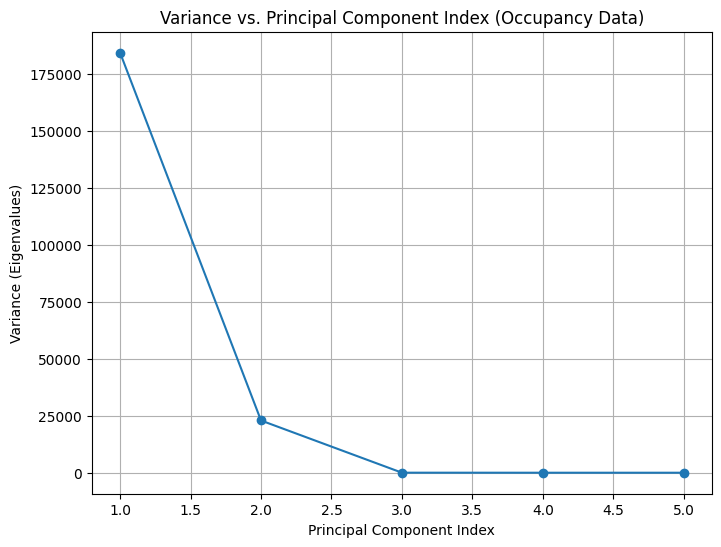

In [3]:
occu_train = np.loadtxt('OccupancyTrain.csv', delimiter=',')
X_occu_train = occu_train[:,:-1]
y_occu_train = occu_train[:,-1]  

eigenvalues_sorted, eigenvectors_sorted, mean_X = PCA(X_occu_train)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(eigenvalues_sorted)+1), eigenvalues_sorted, marker='o')
plt.xlabel("Principal Component Index")
plt.ylabel("Variance (Eigenvalues)")
plt.title("Variance vs. Principal Component Index (Occupancy Data)")
plt.grid(True)
plt.savefig("occupancy_variance_vs_pc.png")
plt.show()

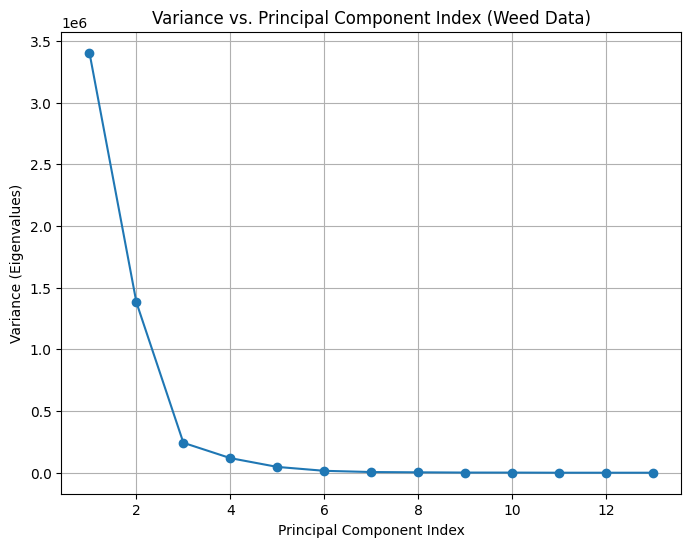

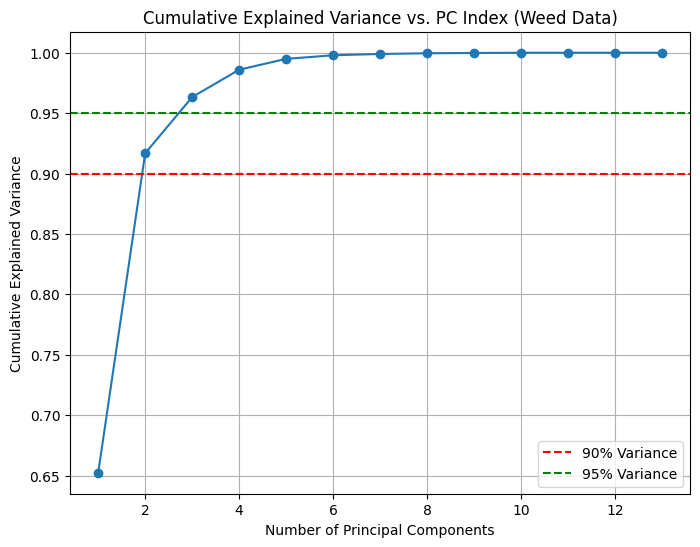

2 PCs (dimensions) are needed to capture 90% of the variance
3 PCs (dimensions) are needed to capture 95% of the variance


In [4]:
weed_train = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
X_weed_train = weed_train[:, :-1]
y_weed_train = weed_train[:, -1]

eigenvalues_sorted, eigenvectors_sorted, mean_X = PCA(X_weed_train)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(eigenvalues_sorted)+1), eigenvalues_sorted, marker='o', linestyle='-')
plt.xlabel("Principal Component Index")
plt.ylabel("Variance (Eigenvalues)")
plt.title("Variance vs. Principal Component Index (Weed Data)")
plt.grid(True)
plt.savefig("weed_variance.png")
plt.show()

cumulative_variance = np.cumsum(eigenvalues_sorted) / np.sum(eigenvalues_sorted)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. PC Index (Weed Data)")
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.axhline(y=0.95, color='g', linestyle='--', label="95% Variance")
plt.legend()
plt.grid(True)
plt.savefig("Cumulative_variance.png")
plt.show()

num_pc_90 = np.argmax(cumulative_variance >= 0.90) + 1
num_pc_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"{num_pc_90} PCs (dimensions) are needed to capture 90% of the variance")
print(f"{num_pc_95} PCs (dimensions) are needed to capture 95% of the variance")

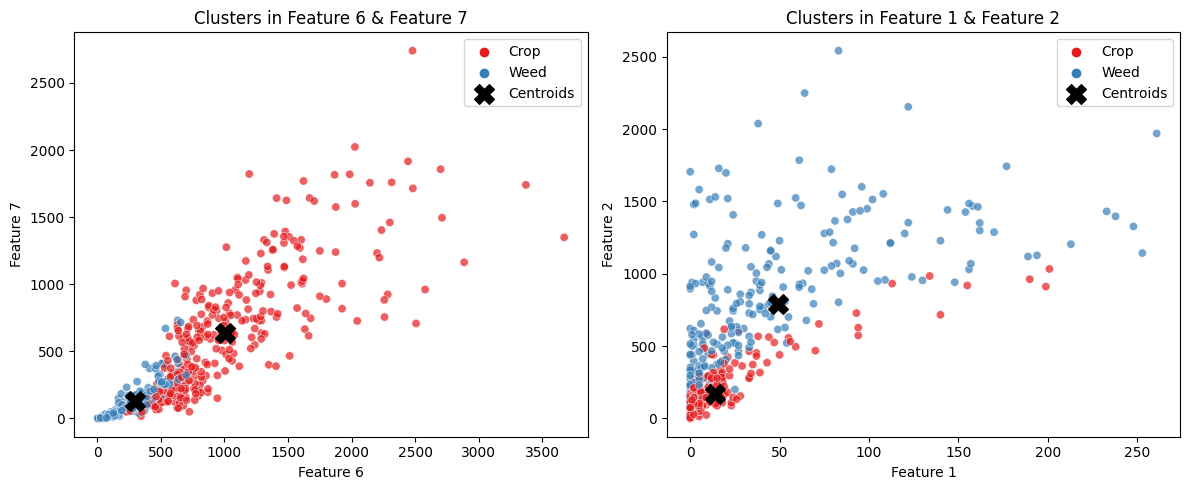

Cluster Center 1: Feature 1: 5.6943, Feature 2: 49.3800, Feature 3: 791.5945, Feature 4: 3847.7134, Feature 5: 3385.8854, Feature 6: 1359.8854, Feature 7: 293.7346, Feature 8: 131.6093, Feature 9: 70.7282, Feature 10: 39.6433, Feature 11: 19.4437, Feature 12: 4.2357, Feature 13: 0.4416
Cluster Center 2: Feature 1: 2.1909, Feature 2: 13.7316, Feature 3: 170.9433, Feature 4: 1394.3648, Feature 5: 3188.5350, Feature 6: 2624.6181, Feature 7: 1003.7202, Feature 8: 632.8147, Feature 9: 495.8299, Feature 10: 295.4008, Feature 11: 145.8091, Feature 12: 29.1985, Feature 13: 2.8374


In [17]:
from sklearn.cluster import KMeans
import seaborn as sns

dataTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
dataTest = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')

XTrain = dataTrain[:, :-1]
YTrain = dataTrain[:, -1]
XTest = dataTest[:, :-1]
YTest = dataTest[:, -1]

startingPoint = np.vstack((XTrain[0,], XTrain[1,]))
kmeans = KMeans(n_clusters=2, init=startingPoint, algorithm='lloyd',n_init=1,random_state=42).fit(XTrain)

cluster_centers = kmeans.cluster_centers_
y_pred = kmeans.predict(XTest)

cluster_labels = {0: "Weed", 1: "Crop"}  
y_pred_labels = np.array([cluster_labels[label] for label in y_pred])  

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=XTest[:, 6], y=XTest[:, 7], hue=y_pred_labels, palette="Set1", alpha=0.7)
plt.scatter(cluster_centers[:, 6], cluster_centers[:, 7], s=200, color='black', marker='X', label="Centroids")
plt.xlabel("Feature 6")
plt.ylabel("Feature 7")
plt.title("Clusters in Feature 6 & Feature 7")
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=XTest[:, 1], y=XTest[:, 2], hue=y_pred_labels, palette="Set1", alpha=0.7)
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 2], s=200, color='black', marker='X', label="Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters in Feature 1 & Feature 2")
plt.legend()

plt.tight_layout()
plt.savefig("kmeans_clusters.png")  
plt.show()

for i, center in enumerate(cluster_centers, start=1):
    formatted_center = ', '.join(f'Feature {j+1}: {center[j]:.4f}' for j in range(len(center)))
    print(f"Cluster Center {i}: {formatted_center}")

In [25]:
from sklearn.linear_model import LinearRegression

X = occu_train[:, [1, 2, 3]] 
t = occu_train[:, 0] 

X_humidity = X[:, [0]].reshape(-1, 1)
model_humidity = LinearRegression().fit(X_humidity, t)
w0_humidity = model_humidity.intercept_
w1_humidity = model_humidity.coef_[0]

model_three = LinearRegression().fit(X, t)
w0_three = model_full.intercept_
w_three = model_full.coef_

print(f"Using only Relative Humidity:")
print(f"w0 (bias) = {w0_humidity:.4f}, w1 (humidity) = {w1_humidity:.4f}")

print("\nUsing Relative Humidity, Light, and CO2:")
print(f"w0 (bias) = {w0_three:.4f}")
print(f"w1 (humidity) = {w_three[0]:.4f}, w2 (light) = {w_three[1]:.4f}, w3 (CO2) = {w_three[2]:.4f}")

Using only Relative Humidity:
w0 (bias) = 21.0634, w1 (humidity) = -0.0017

Using Relative Humidity, Light, and CO2:
w0 (bias) = 21.1269
w1 (humidity) = -0.0636, w2 (light) = 0.0019, w3 (CO2) = 0.0014
